**ebb** Tutorial
================

In [1]:
from __future__ import print_function, division

In [2]:
import ebb
from ebb.units import Quantity as Q
from ebb.fluids import Air, Water
from ebb.pipes import CircularPipe, RectangularPipe

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np

Incompressable Fluids
---------------------

In [6]:
print(Water)
print(Water.viscosity().to('cpoise'))
print(Water.viscosity(temperature=40, pressure='1.1 bar').to('cpoise'))

<class 'ebb.fluids.Water.Water'>
0.8904389816146542 centipoise
0.6514278843596056 centipoise


Circular Pipe
-------------

CircularPipe(length=<Quantity(10 dimensionless, 'meter')>, radius=<Quantity(0.001 dimensionless, 'meter')>)
0.957605179606717 dimensionless meter / second


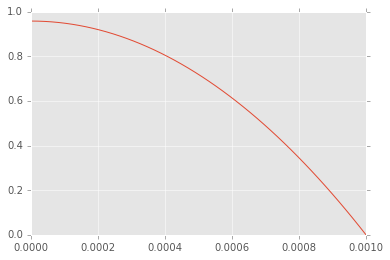

In [4]:
pipe = CircularPipe(0.001, 10)
print(pipe)
print(pipe.maximum_velocity(fluid=Air, pressure=Q('0.1 psi')))

radii = Q(np.linspace(0, .001), 'm')
v = [pipe.velocity(r, 0, fluid=Air, pressure=Q('0.1 psi')).m for r in radii]
plt.plot(radii, v)
plt.show()

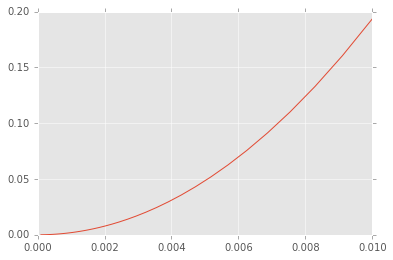

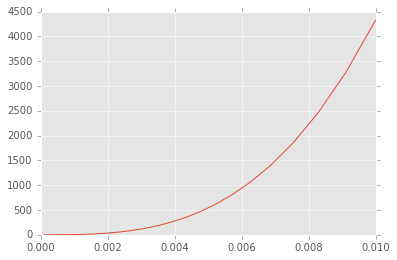

In [9]:
L = Q('1 m')

radii = Q(np.logspace(-4, -2), 'm')

velocities = []
reynolds = []

for r in radii:
    pipe = CircularPipe(r, L)
    velocities.append(pipe.maximum_velocity(fluid=Water, pressure=Q('0.001 psi')).m)
    reynolds.append(pipe.reynolds(fluid=Water, pressure=Q('0.001 psi')))
plt.plot(radii, velocities)
plt.show()
plt.plot(radii, reynolds)
plt.show()